In [1]:
# 1. Import
from kicad_draw.models import HelixRectangleParams
from kicad_draw.PCBmodule import PCBdraw

In [2]:
# 2. Parameter setting
params = HelixRectangleParams(
    x0=150.0,
    y0=100.0,
    width=30.0,
    height=20.0,
    corner_radius=1.0,
    layer_index_list=[0, 1, 2, 3, 4, 5],
    track_width=0.5,
    connect_width=0.2,
    drill_size=0.2,
    via_size=0.4,
    net_number=1,
    port_gap=0.65,
    tab_gap=0.55,
)

In [3]:
# 3. Draw
pcb = PCBdraw(stackup="default_6layer", mode="file")
pcb.draw_helix_rectangle(params)

In [4]:
# 4. Export
s_expressions = pcb.export()
print("KiCad s-expressions (copy to your .kicad_pcb file):")
print(s_expressions)

# Optional: save to file
pcb.save("rectangular_helix_coil.kicad_pcb")
print(f"\nSaved {len(pcb.elements)} elements to rectangular_helix_coil.kicad_pcb")

KiCad s-expressions (copy to your .kicad_pcb file):
(segment (start 136.0 90.0) (end 164.0 90.0) (width 0.5) (layer "F.Cu") (net 1) (tstamp 0))
(segment (start 165.0 91.0) (end 165.0 98.05) (width 0.5) (layer "F.Cu") (net 1) (tstamp 0))
(segment (start 165.0 98.7) (end 165.0 109.0) (width 0.5) (layer "F.Cu") (net 1) (tstamp 0))
(segment (start 164.0 110.0) (end 136.0 110.0) (width 0.5) (layer "F.Cu") (net 1) (tstamp 0))
(segment (start 135.0 109.0) (end 135.0 91.0) (width 0.5) (layer "F.Cu") (net 1) (tstamp 0))
(segment (start 135.0 91.0) (end 135.00012336751834 90.98429268268818) (width 0.5) (layer "F.Cu") (net 1) (tstamp 0))
(segment (start 135.00012336751834 90.98429268268818) (end 135.00049343963425 90.96858924092187) (width 0.5) (layer "F.Cu") (net 1) (tstamp 0))
(segment (start 135.00049343963425 90.96858924092187) (end 135.00111012503802 90.95289354929035) (width 0.5) (layer "F.Cu") (net 1) (tstamp 0))
(segment (start 135.00111012503802 90.95289354929035) (end 135.00197327157173

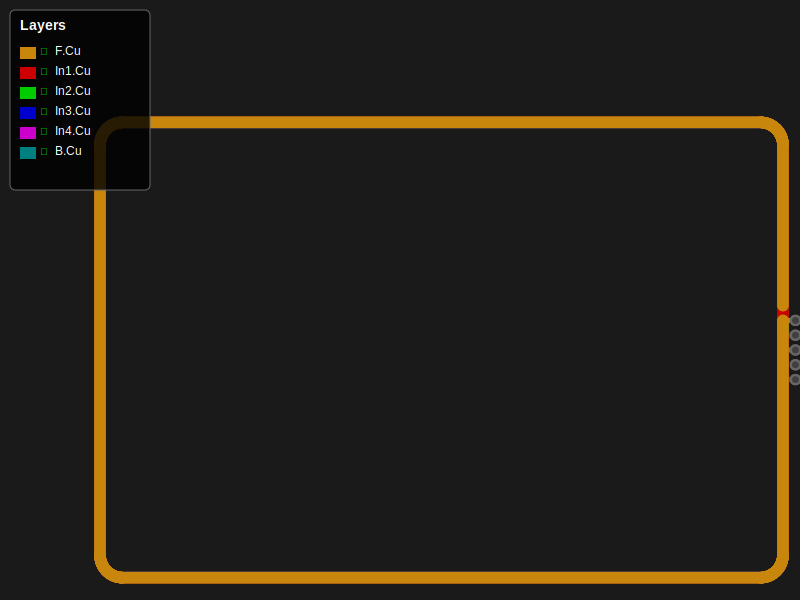

In [5]:
# 5. Visualization
visible_layers = [
    0,
    1,
    2,
    3,
    4,
    5,
]  # Edit this list: 0=F.Cu, 1=In1.Cu, 2=In2.Cu, 3=In3.Cu, 4=In4.Cu, 5=B.Cu
show_vias = True

# Get SVG visualization
svg_content = pcb.visualize(visible_layers=visible_layers, show_vias=show_vias)

# Display in Jupyter
try:
    from IPython.display import SVG, display

    display(SVG(svg_content))
except ImportError:
    print("SVG content (save to .svg file to view):")
    print(svg_content[:200] + "..." if len(svg_content) > 200 else svg_content)